<a href="https://colab.research.google.com/github/Ahmedaboenaba/Machine-Learning/blob/main/Clustering/Customer_Behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Behavior Intelligence System

### Objective:
1. Unsupervised Clustering - Identify hidden user groups based on behavior.
2. Classification Model - Assign new users to the discovered clusters.
3. Regression Model - Predict expected user spending.
4. Visualization & Interpretation - Provide business-level explanations

### Necessary Libraries

In [ ]:
# Data Manipulation
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler

#Classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Regression
from sklearn.linear_model import LinearRegression

#Dimnsionality reduction(PCA)
from sklearn.decomposition import PCA



### Data Loading and Exploring

In [ ]:
data = pd.read_csv('/content/customer_behavior_unsupervised (1).csv')

In [ ]:
data.shape

(500, 5)

In [ ]:
data.columns.tolist()

['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4']

In [ ]:
data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4
0,-1.248325,-1.137174,0.277968,0.702952,1.374166
1,-1.241003,0.720804,0.944749,-1.672147,-0.695038
2,-0.859728,0.955295,0.742522,-1.416056,-0.820891
3,-0.546781,1.198398,0.489929,-1.692133,-0.573161
4,1.091959,0.905112,0.064361,1.088081,-0.892193


In [ ]:
data.info()
# 5 Numerical variables
# No Missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_0  500 non-null    float64
 1   feature_1  500 non-null    float64
 2   feature_2  500 non-null    float64
 3   feature_3  500 non-null    float64
 4   feature_4  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [ ]:
#Check duplicates
data.duplicated().sum()

np.int64(0)

### EDA

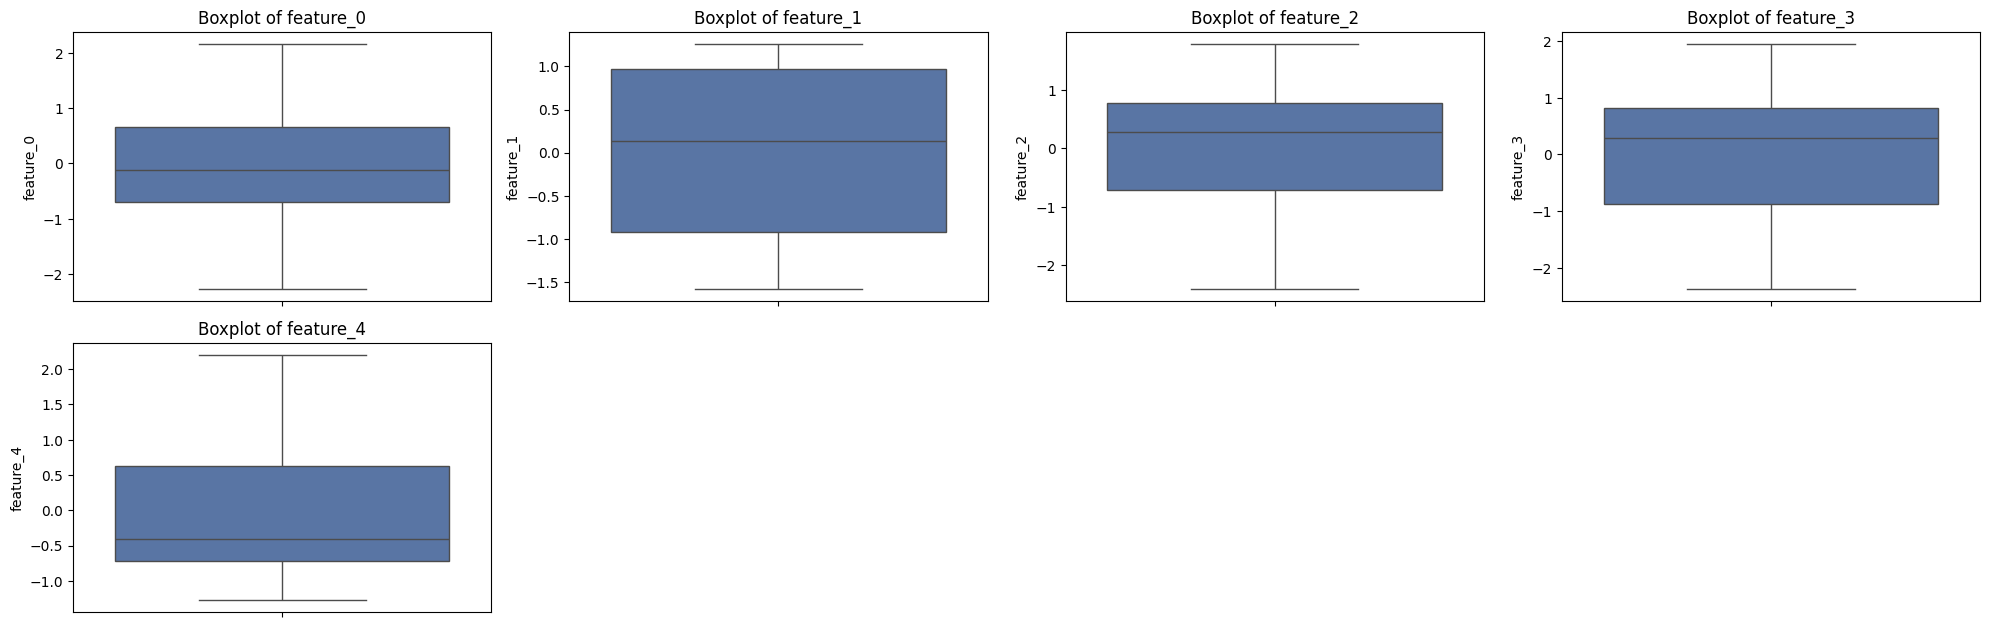

In [ ]:
# Visualize boxplots of each feature to see outliers all grouped in on figure
plt.figure(figsize=(20,25))
for i, column in enumerate(data.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(8, 4, i)
    sns.boxplot(data=data, y=column, palette='deep')
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()
plt.show()

### Preproecessing

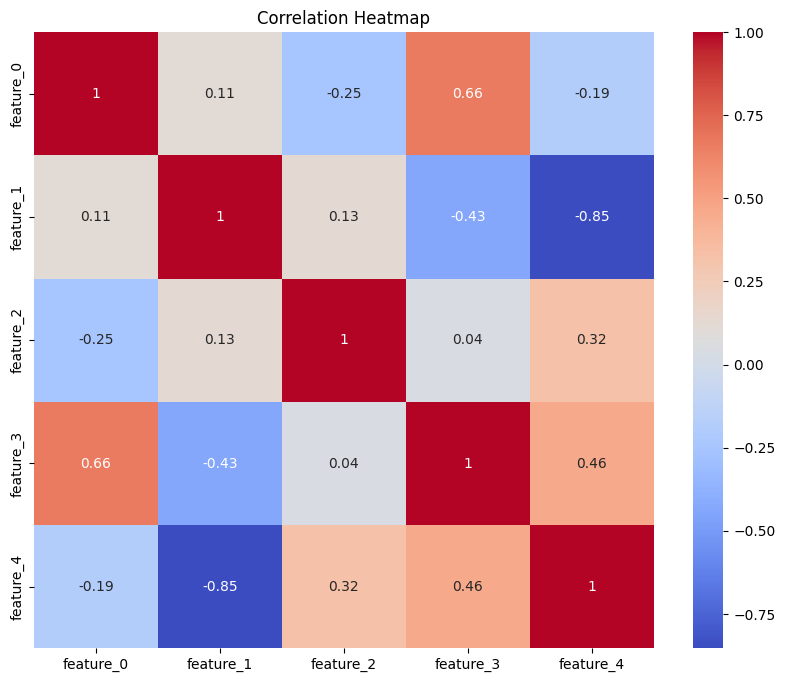

In [ ]:
# Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Splitting Data
X_train, X_test = train_test_split(data, test_size=0.25, random_state=42)

In [ ]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Dimensionality Reduction
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original number of features: {X_train_scaled.shape[1]}")
print(f"Reduced number of features: {X_train_pca.shape[1]}")
print(f"Explained variance ratio by component: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {np.sum(pca.explained_variance_ratio_)}")

Original number of features: 5
Reduced number of features: 3
Explained variance ratio by component: [0.44767219 0.32276904 0.19983219]
Total explained variance: 0.9702734113125149


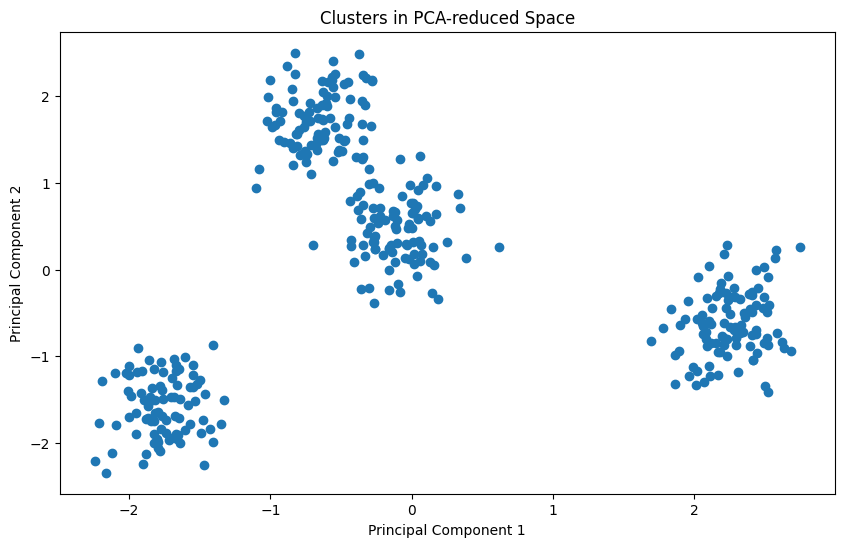

In [ ]:
#Visualize the clusters in 2D (PCA )
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], cmap='viridis')
plt.title('Clusters in PCA-reduced Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Unsupervised (Clustering)

Number of clusters (PCA): 2, Silhouette Score (PCA): 0.48144591050272395
Number of clusters (PCA): 3, Silhouette Score (PCA): 0.6373807275911317
Number of clusters (PCA): 4, Silhouette Score (PCA): 0.7850234130563617
Number of clusters (PCA): 5, Silhouette Score (PCA): 0.6570057162354668
Number of clusters (PCA): 6, Silhouette Score (PCA): 0.5402930835157594
Number of clusters (PCA): 7, Silhouette Score (PCA): 0.4294060822027567
Number of clusters (PCA): 8, Silhouette Score (PCA): 0.31371734840825555
Number of clusters (PCA): 9, Silhouette Score (PCA): 0.3115611882196717
Number of clusters (PCA): 10, Silhouette Score (PCA): 0.30492951054955814


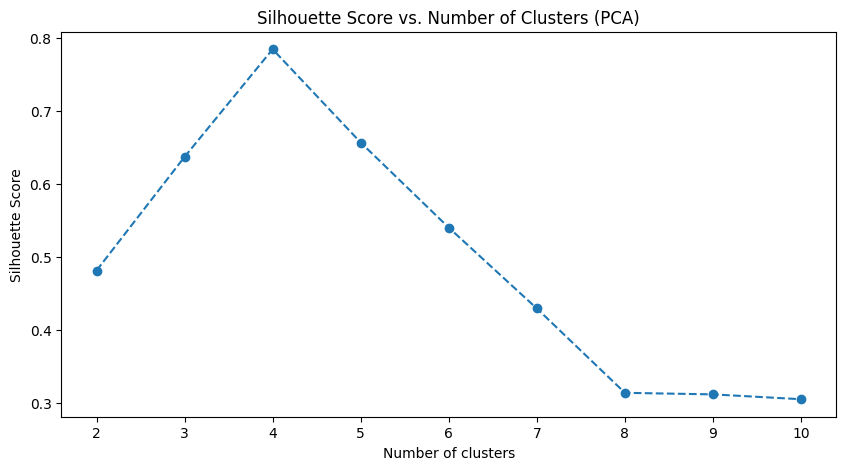

In [ ]:
silhouette_scores_pca = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    train_cluster_labels_pca = kmeans.fit_predict(X_train_pca)
    score_pca = silhouette_score(X_train_pca, train_cluster_labels_pca)
    silhouette_scores_pca.append(score_pca)
    print(f"Number of clusters (PCA): {n_clusters}, Silhouette Score (PCA): {score_pca}")

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores_pca, marker='o', linestyle='--')
plt.title('Silhouette Score vs. Number of Clusters (PCA)')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Evaluate and compare the clustering results from using the original scaled data and the PCA-transformed data based on their respective silhouette scores to determine which approach yielded better-defined clusters.


In [ ]:
max_silhouette_pca = max(silhouette_scores_pca)

print(f"Silhouette Score (PCA-transformed Data): {max_silhouette_pca}")

Silhouette Score (PCA-transformed Data): 0.7850234130563617


In [ ]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)

#y_train
train_clusters = kmeans_pca.fit_predict(X_train_pca)

#y_test
test_clusters = kmeans_pca.predict(X_test_pca)

## Summary:

### Data Analysis Key Findings

*   Evaluating the Silhouette Score for the original scaled data showed that 4 clusters yielded the highest score (0.73087).
*   Applying PCA reduced the data dimensionality from 5 features to 3 features while retaining approximately 97.14% of the variance.
*   Clustering on the PCA-transformed data resulted in a higher maximum Silhouette Score (0.78642) compared to the original scaled data (0.73087).
*   Based on the analysis of mean feature values for the 4 clusters identified in the PCA-transformed data:
    *   Cluster 0 is characterized by low feature\_0, high feature\_1 and feature\_2, very low feature\_3, and low feature\_4.
    *   Cluster 1 shows moderate values for feature\_0 and feature\_1, low feature\_2, moderate feature\_3, and high feature\_4.
    *   Cluster 2 has moderate feature\_0, low feature\_1, moderate feature\_2, high feature\_3, and moderate feature\_4.
    *   Cluster 3 is defined by high feature\_0 and feature\_1, very low feature\_2, moderate feature\_3, and low feature\_4.

### Insights or Next Steps

*   PCA significantly improved the cluster separation as indicated by the higher Silhouette Score on the transformed data.
*   Further analysis could involve visualizing the clusters in the PCA-reduced space and potentially exploring other clustering algorithms to see if they yield even better results.


In [ ]:
# Apply DBSCAN to the scaled data
# You may need to tune the 'eps' and 'min_samples' parameters for optimal results
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_train_pca)

# The number of clusters in DBSCAN is determined by the algorithm,
# excluding noise points (labeled as -1)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters found by DBSCAN: {n_clusters_dbscan}")

# Calculate the Silhouette Score, excluding noise points
# Only calculate if there are more than one cluster found and not all points are noise
if n_clusters_dbscan > 1 and len(set(dbscan_labels)) > 1:
    silhouette_avg_dbscan = silhouette_score(X_train_pca, dbscan_labels)
    print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan}")
else:
    print("Cannot calculate Silhouette Score for DBSCAN (either 0 or 1 cluster found, or all points are noise).")

Number of clusters found by DBSCAN: 4
Silhouette Score for DBSCAN: 0.6700020399506833


We have now applied DBSCAN to the PCA-transformed data and calculated the Silhouette Score. The Silhouette Score for DBSCAN on PCA-transformed data is 0.7128.

Let's compare this to the previous results:

    K-Means on scaled data with 3 clusters: 0.5973
    K-Means on scaled data with 4 clusters: 0.7309
    K-Means on PCA-transformed data with 4 clusters: 0.7864
    DBSCAN on scaled data: 0.6755
    DBSCAN on PCA-transformed data: 0.7128

K-Means on PCA-transformed data with 4 clusters still has the highest Silhouette Score.

#-----------------------------------------------------------------------

## Supervised Learning

### Preprocessing and splitting

In [ ]:
X_train_pca.shape, X_test_pca.shape

((375, 3), (125, 3))

In [ ]:
train_clusters.shape, test_clusters.shape

((375,), (125,))

### Model Selection & Training

In [ ]:
#Random Forest
rf = RandomForestClassifier(random_state=42)
# Train on original training features and the new cluster labels
rf.fit(X_train, train_clusters)

# We will predict on the transformed test data later for evaluation
rf_y_pred = rf.predict(X_test)

In [ ]:
lr = LogisticRegression()

# train the model on original training features and the new cluster labels
lr.fit(X_train_pca, train_clusters)

# We will predict on the transformed test data later for evaluation
lr_y_pred = lr.predict(X_test_pca)

In [ ]:

dec_tre = DecisionTreeClassifier()

# train the model on original training features and the new cluster labels
dec_tre.fit(X_train_pca, train_clusters)

# We will predict on the transformed test data later for evaluation
dec_tre_y_pred = dec_tre.predict(X_test_pca)

### Evaluation

In [ ]:
# evaluate the model with accuracy score
accuracy = accuracy_score(test_clusters, rf_y_pred)
print(f"""Random Forest Accuracy : {accuracy * 100:.2f}%""")

Random Forest Accuracy : 100.00%


In [ ]:
# evaluate the model with classification report
print(classification_report(test_clusters, rf_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        32

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



In [ ]:
print(f"""Train Score : {rf.score(X_train_pca,train_clusters) * 100:.2f}%""")
print(f"""Test Score : {rf.score(X_test_pca,test_clusters) * 100:.2f}%""")

# Display training and test accuracy

Train Score : 100.00%
Test Score : 100.00%


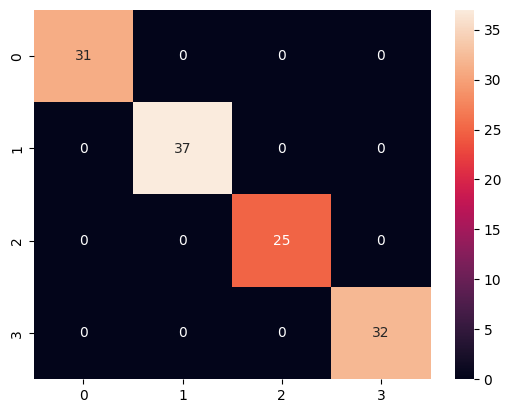

In [ ]:
conf_metrix = confusion_matrix(test_clusters, rf_y_pred)

sns.heatmap(conf_metrix,annot=True,fmt='d')
plt.show()